# Unidade 1

# Aula 1

In [1]:
import pandas as pandas

In [2]:
notas = pandas.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
notas.columns = 'usuário','filmeID','nota','hora'

In [6]:
notas['nota'].mean()
notas['nota'].median()

3.5

In [7]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

# Aula 2

<AxesSubplot:ylabel='Frequency'>

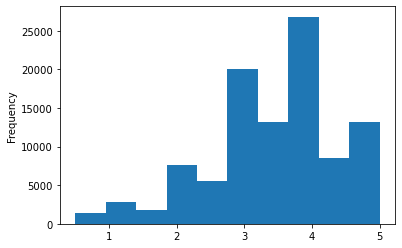

In [9]:
notas.nota.plot(kind = 'hist')

In [10]:
import seaborn as seaborn

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

# Unidade 2

# Aula 1

In [12]:
filmes = pandas.read_csv('movies.csv')
filmes.columns = ['filmeID','titulo','generos']
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
notas.query('filmeID==1').nota.mean()

3.9209302325581397

In [14]:
notas.groupby('filmeID')

In [15]:
medias_por_filme = notas.groupby('filmeID').mean()['nota']
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

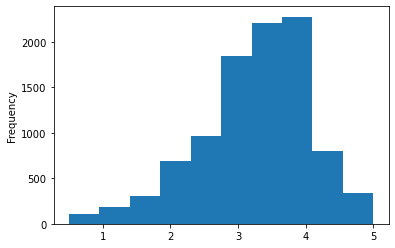

In [16]:
medias_por_filme.plot(kind='hist')

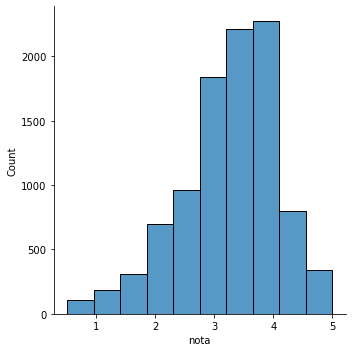

In [17]:
seaborn.displot(medias_por_filme, bins = 10)

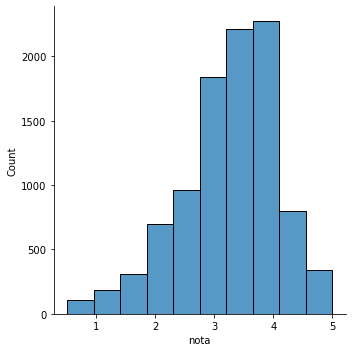

In [18]:
seaborn.displot(medias_por_filme, bins = 10)

In [19]:
import matplotlib.pyplot as mplot

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

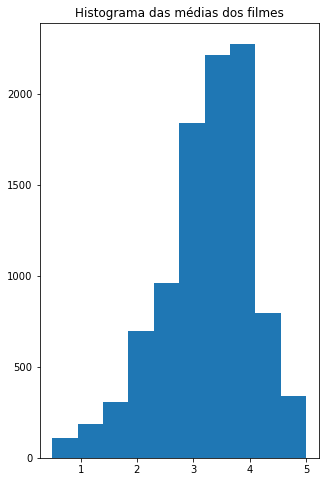

In [20]:
mplot.figure(figsize = (5,8))
mplot.title("Histograma das médias dos filmes")
mplot.hist(medias_por_filme)

In [21]:
type(medias_por_filme)

pandas.core.series.Series

# UNIDADE 3

# AULA 1

In [22]:
tmdb = pandas.read_csv('tmdb_5000_movies.csv')
tmdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [23]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# UNIDADE 4 e 5

# AULA 1

In [24]:
idiomas = tmdb['original_language'].value_counts().to_frame().reset_index() #transforma num data frame
idiomas.columns = ['lingua', 'total']
idiomas.head()

,lingua,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='lingua', ylabel='total'>

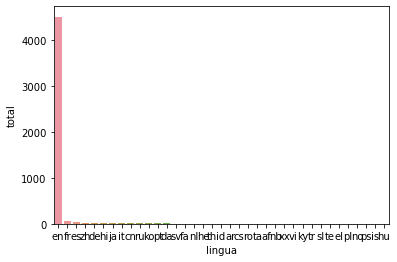

In [25]:
seaborn.barplot(x = 'lingua',y = 'total', data = idiomas)

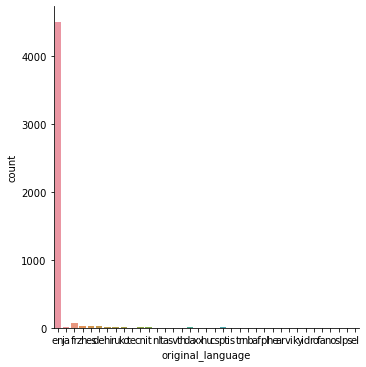

In [26]:
seaborn.catplot(x = 'original_language', kind = 'count', data = tmdb) #formato sem definição de value counts

In [27]:
print(seaborn.__version__)

0.11.0


# AULA 2

In [28]:
# mplot.pie(idiomas['total'],labels = idiomas['lingua']) #gráfico ruim

In [29]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_en = total_por_lingua.loc['en']
total_resto = total_geral - total_en
print(total_en,total_geral)

4505 4803


In [30]:
dados = {
    'lingua' : ['ingles','outros'],
    'total': [total_en,total_resto]
}
dados = pandas.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

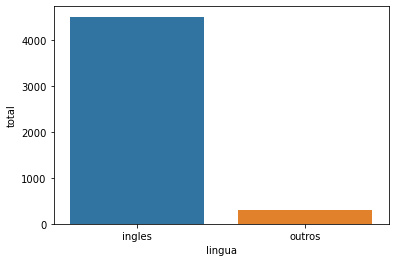

In [31]:
seaborn.barplot(x = 'lingua', y = 'total', data = dados)

# AULA 3

([<matplotlib.patches.Wedge at 0x224f70be9d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

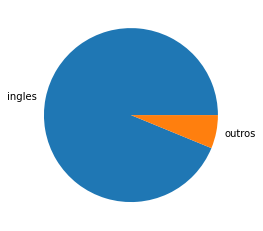

In [32]:
mplot.pie(dados['total'], labels = dados['lingua'])

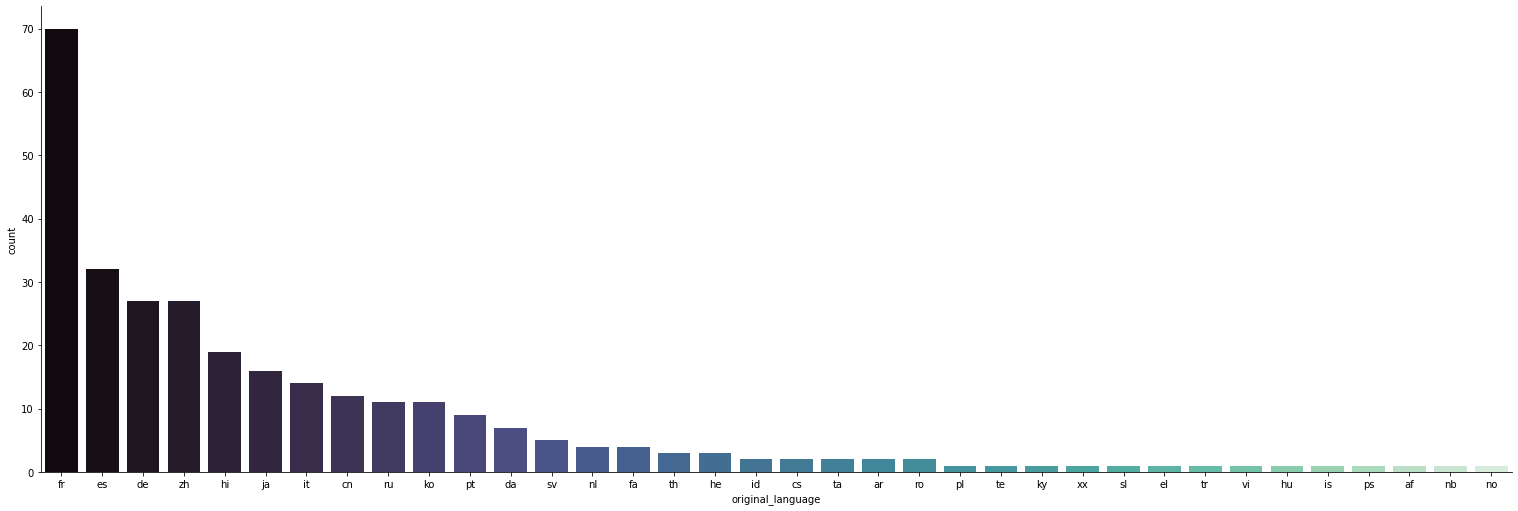

In [33]:
estrangeiros = tmdb.query("original_language != 'en'")
total_estrangeiros = tmdb.query("original_language != 'en'").original_language.value_counts() #o index da variável já organiza as categorias
seaborn.catplot(x = 'original_language',
                kind = 'count', 
                data = estrangeiros,
                aspect = 3,
                height = 7,
                order = total_estrangeiros.index,
                palette = 'mako')

# UNIDADE 6

# AULA 1

In [34]:
notas.head(2)
import numpy as numpy

In [35]:
notas_toystory = notas.query('filmeID == 1')
notas_jumanji  = notas.query('filmeID == 2')
print(len(notas_toystory),len(notas_jumanji))

215 110


In [40]:
print("Média Toy Story %.2f" % notas_toystory.nota.mean())
print("Média Jumanji %.2f" % notas_jumanji.nota.mean())
print("Mediana Toy Story %.2f" % notas_toystory.nota.median())
print("Mediana Jumanji %.2f" % notas_jumanji.nota.median())
print("Desvio Toy Story %.2f" % notas_toystory.nota.std())
print("Desvio Jumanji %.2f" % notas_jumanji.nota.std())

Média Toy Story 3.92
Média Jumanji 3.43
Mediana Toy Story 4.00
Mediana Jumanji 3.50
Desvio Toy Story 0.83
Desvio Jumanji 0.88


<AxesSubplot:xlabel='filmeID', ylabel='nota'>

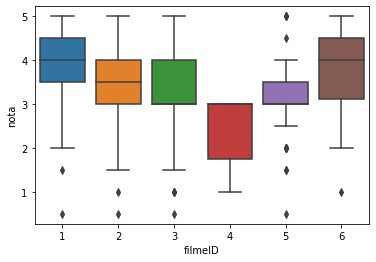

In [39]:
seaborn.boxplot(x = "filmeID",y = 'nota', data = notas.query("filmeID in [1,2,3,4,5,6]"))

# FIM DO CURSO